
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [5]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used for visualization 
! pip install pingouin
import pingouin as pg # used for conducting statistical analysis and exploring relationships within datasets

df_mh = pd.read_csv('MillerHadenData.csv')



In [6]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None



Based on the results, we can determine the types of data as follows:
    

Participant: This appears to be an identifier or label for each individual in the dataset. It is categorical data.
    

Abil (Ability): This variable represents some measure of ability. Since it is measured on an interval scale (numeric values with meaningful distances between them), it is interval data.
    

IQ (Intelligence Quotient): Similarly, IQ is measured on a scale with meaningful distances between values, making it interval data.
    

Home: This variable likely represents some measure related to home environment or conditions. Without further context, it's difficult to definitively classify it. If it represents categories (e.g., types of homes), it could be ordinal data. If it represents actual measurements (e.g., square footage of homes), it could be interval or ratio data.
    

TV: This variable likely represents some measure related to television usage or ownership. Similar to the "Home" variable, without further context, it's difficult to definitively classify it. If it represents categories (e.g., types of TVs), it could be ordinal data. If it represents actual measurements (e.g., hours of TV watched per day), it could be interval or ratio data.
    

In summary:

Abil and IQ are interval data.
Home and TV may be ordinal, interval, or ratio data depending on their specific meaning, which would require additional context to determine accurately.






In [7]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
participants_with_both_variables = df_mh.dropna(subset=['Abil', 'IQ'])['Participant'].unique()
all_participants = df_mh['Participant'].unique()



Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64


According to the output, there are no missing values (denoted as 0) for each variable: Participant, Abil, IQ, Home, and TV. This means that there is a data point for each participant on all variables in the dataset. Therefore, for each participant, there are measurements available for both Abil and IQ variables.

In [8]:
# Q1c (code):
# Check data distribution
print(df_mh.describe())


       Participant       Abil          IQ        Home          TV
count    25.000000  25.000000   25.000000   25.000000   25.000000
mean     13.000000  55.120000  100.040000  124.000000  599.920000
std       7.359801   6.084954    9.043782   21.039645   95.056965
min       1.000000  45.000000   81.000000   87.000000  407.000000
25%       7.000000  50.000000   95.000000  108.000000  523.000000
50%      13.000000  54.000000  100.000000  123.000000  636.000000
75%      19.000000  61.000000  104.000000  141.000000  673.000000
max      25.000000  67.000000  118.000000  161.000000  787.000000


We cannot directly ascertain whether the variables Abil and IQ strictly follow a normal distribution. Although we can observe the mean, standard deviation, median, and percentiles of the data, these statistics alone are not sufficient to determine normality. We can use scatter plots and correlation lines to observe the distribution and the relationship between variables, but they are not definitive tests for normality.

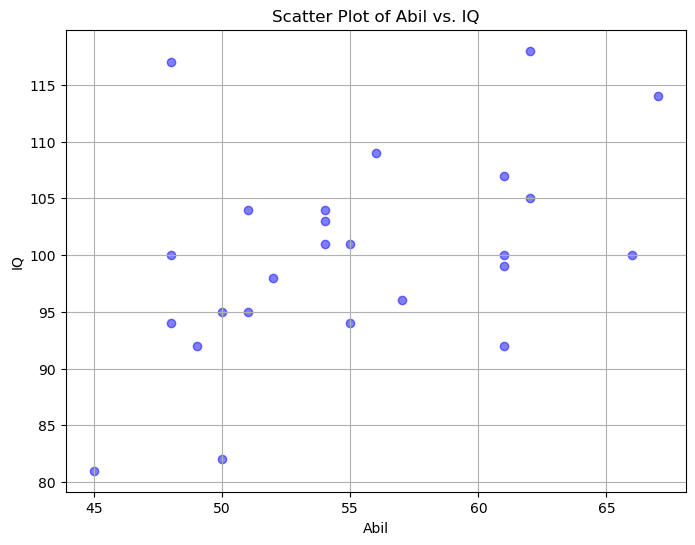

In [9]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Abil vs. IQ')
plt.xlabel('Abil')
plt.ylabel('IQ')
plt.grid(True)
plt.show()



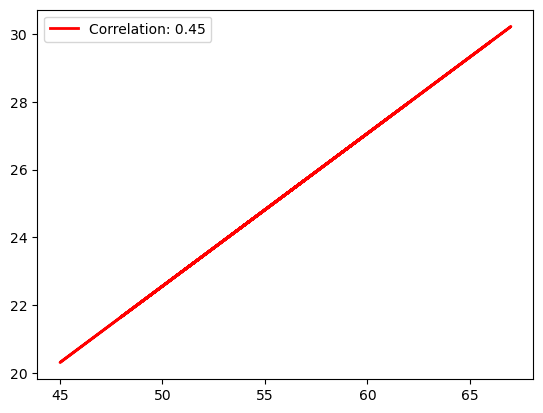

In [10]:
# Q1e (code):
# Correlation line
corr = df_mh['Abil'].corr(df_mh['IQ'])
plt.plot(df_mh['Abil'], df_mh['Abil'] * corr, color='red', linestyle='-', linewidth=2, label=f'Correlation: {corr:.2f}')
plt.legend()

plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
We can utilize the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two variables. It assumes that the relationship between variables is linear and is typically used for analyzing correlations between continuous variables. Given our analytical objective of detecting whether there is a relationship between intellect and reading ability, as observed from the Correlation line plot in Question 1, which indicates a linear relationship between the two, and also supported by the scatter plot showing a linear distribution of data points, we can hypothesize that the relationship between intellect and reading ability exhibits linear correlation.

In [38]:
# Q2b (code):
from scipy.stats import pearsonr


pearson_corr, p_value = pearsonr(df_mh['IQ'], df_mh['Abil'])

print(f"Pearson correlation coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.4f}")


Pearson correlation coefficient: 0.45
P-value: 0.0236


# Q2c (answer with words):
The Pearson correlation coefficient of 0.45 indicates a positive linear relationship between intellect (IQ) and reading ability (Abil). The p-value of 0.0236 suggests that the probability of observing such a correlation coefficient or more extreme under the null hypothesis is approximately 2.36%. Since the p-value is less than the significance level (typically set at 0.05), we can reject the null hypothesis, confirming that this correlation coefficient is significant. Taken together, these results indicate a significant positive linear relationship of moderate strength between intellect (IQ) and reading ability (Abil).

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
 H0:The distribution of reading ability (low vs. high) is independent of the distribution of the amount of time spent reading at home per week (infrequent vs. frequent).
 
 
 H1：There is a dependence between reading ability (low vs. high) and the amount of time spent reading at home per week (infrequent vs. frequent).

In [12]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data manipulation and analysis
from scipy.stats import chi2_contingency ##used for performing the chi-square test of independence on two categorical variables

# Define the rounded average for Reading Ability and Home
rounded_avg_abil = round(df_mh['Abil'].mean())
rounded_avg_home = round(df_mh['Home'].mean())


# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'low' if x <= rounded_avg_abil else 'high')


# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'infrequent' if x <= rounded_avg_home else 'frequent')

print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      high    frequent
1            2    56  109   123  608      high  infrequent
2            3    45   81   108  640       low  infrequent
3            4    66  100   155  493      high    frequent
4            5    49   92   103  636       low  infrequent


In [13]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print(contingency_matrix)

Rank_Home  frequent  infrequent
Rank_Abil                      
high              8           2
low               3          12


In [14]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_matrix)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected_freq)


Chi-square statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):

Based on the Chi-square test results:

The Chi-square statistic is 6.50, indicating a significant difference between the observed data and the expected independence model.
The p-value is 0.0108, which is less than the typical significance level (e.g., 0.05). Thus, we reject the null hypothesis and conclude that there is a significant association between reading ability and time spent reading at home.
There is 1 degree of freedom because there are two categories of variables (low reading ability vs. high reading ability) when constructing the contingency table.
The expected frequencies table shows the expected frequencies in each cell under the null hypothesis.
In conclusion, based on the Chi-square test, we can conclude that there is a significant association between reading ability and time spent reading at home in the given data.


## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [15]:

import pandas as pd # used for data manipulation and analysis
from scipy import stats #uesd for statistical analysis
import numpy as np #used for multi-dimensional arrays and matrices
import matplotlib.pyplot as plt #used for visualization
import seaborn as sns #used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [17]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

print("Mean age:", mean_age)
print("Standard deviation of age:", std_dev_age)


Mean age: 30.852941176470587
Standard deviation of age: 6.238358141327351


The mean age of the evaluators is 30.852, and the standard deviation of the age of the evaluators is 6.238.

In [18]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators['sex'] == 1).sum()
female_count = (df_evaluators['sex'] == 2).sum()

print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)

Number of male evaluators: 4
Number of female evaluators: 30


According to the results, 4 participants are male and 30 participants are female.

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [19]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [29]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'


# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[~df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')


# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):

Null hypothesis:
There is no significant difference in overall ratings (intellect/hire/impression) between evaluators who listened to pitches and evaluators who read pitches.

Alternative hypothesis:
There is a significant difference in overall ratings (intellect/hire/impression) between evaluators who listened to pitches and evaluators who read pitches.

We could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

In this situation, we should choose a two-tailed t-test.

A two-tailed test is appropriate when we are interested in whether there is a significant difference between the two groups, but we don't have an a priori hypothesis about the direction of the difference. In other words, we want to know if there is any difference between the listened group and the read group, regardless of whether the listened group's ratings are higher or lower than the read group's ratings.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independent variable is the condition under which the evaluators reviewed the pitches. Specifically, it is the mode of presentation of the pitches: whether the evaluators listened to the pitches or read them.

The dependent variable, on the other hand, is the overall ratings given by the evaluators. These ratings can be related to various aspects such as intellect, hireability, or overall impression. Therefore, the dependent variable is the evaluators' overall ratings.



To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [36]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby(['Category', 'condition']).apply(lambda x: shapiro(x['Rating']))

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating'],
                        ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating'],
                        ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating'])


#Independent t-tests
ttest_results_intellect = ttest_ind(ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating'],
                                    ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results_impression = ttest_ind(ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating'],
                                     ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results_hire = ttest_ind(ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating'],
                               ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results = (ttest_results_intellect, ttest_results_impression, ttest_results_hire)


ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

#Q7b (answer in words):

Results:
    
The descriptive statistics provide information about the central tendency (mean), variability (standard deviation), and distribution of ratings for each category (intellect, hire, impression) under each condition (listened, read).
For example, in the 'hire' category, the mean rating for evaluators who listened is higher (4.71) compared to those who read (2.89), indicating a potential difference in perceived hireability between the two conditions.

The Shapiro-Wilk test assesses the normality of the distribution of ratings within each category and condition.
The test statistic and p-value are provided for each combination of category and condition.
A non-significant p-value (typically > 0.05) suggests that the data follows a normal distribution.
In this case, all p-values are greater than 0.05, indicating that the assumption of normality is met for all groups.


Levene's test evaluates the homogeneity of variances between groups.
The test statistic and p-value are provided.
A non-significant p-value (typically > 0.05) suggests that the variances are homogeneous across groups.
Here, the p-value is 0.642, indicating that the assumption of homogeneity of variances is met.


Independent t-tests compare the means of two independent groups to determine if there is a statistically significant difference between them.
The test statistic (t-value) and p-value are provided for each category.
A significant p-value (typically < 0.05) suggests that there is a significant difference between the means of the two groups.
In this case, all p-values are less than 0.05, indicating that there are significant differences in ratings between evaluators who listened and those who read, across all categories (intellect, hire, impression).


Explanations:
    
We use descriptive statistics to summarize the characteristics of the data.
Shapiro-Wilk and Levene's tests are used to check assumptions required for t-tests, namely normality and homogeneity of variances, respectively.
The independent t-tests are used to determine if there are significant differences in ratings between the two conditions (listened vs. read).

Decisions based on the results:
We can conclude that the data meets the assumptions required for t-tests.
There are significant differences in ratings between evaluators who listened and those who read, across all categories.




